# Analyzing the trends of COVID-19 with Python

Problem Statement: 

Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of 
infection and recovery as well as make predictions about the number of cases expected a week in future 
based on the current trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('covid_19_clean_complete.csv')

In [3]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [4]:
df.rename(columns={'Date':'date',
                  'Province/State':'state',
                  'Country/Region':'country',
                  'Lat':'lat','Long':'long',
                  'Confirmed':'confirmed',
                   'Deaths':'deaths',
                  'Recovered':'recovered',
                  'Active':'active',
                  },inplace = True)

In [5]:
df

state                country        lat       long        date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       14664 non-null  object 
 1   country     49068 non-null  object 
 2   lat         49068 non-null  float64
 3   long        49068 non-null  float64
 4   date        49068 non-null  object 
 5   confirmed   49068 non-null  int64  
 6   deaths      49068 non-null  int64  
 7   recovered   49068 non-null  int64  
 8   active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

state         34404
country           0
lat               0
long              0
date              0
confirmed         0
deaths            0
recovered         0
active            0
WHO Region        0
dtype: int64

In [8]:
df['active'] = df['confirmed']- df['deaths']- df['recovered']

In [9]:
df

state                country        lat       long        date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

# Visulization

In [10]:
top = df[df['date'] == df['date'].max()] 
top

state                country        lat       long        date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active             WHO Region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

In [11]:
world = top.groupby('country')['confirmed','active','recovered','deaths'].sum().reset_index()  
world

country  confirmed  active  recovered  deaths
0           Afghanistan      36263    9796      25198    1269
1               Albania       4880    1991       2745     144
2               Algeria      27973    7973      18837    1163
3               Andorra        907      52        803      52
4                Angola        950     667        242      41
..                  ...        ...     ...        ...     ...
182  West Bank and Gaza      10621    6791       3752      78
183      Western Sahara         10       1          8       1
184               Yemen       1691     375        833     483
185              Zambia       4552    1597       2815     140
186            Zimbabwe       2704    2126        542      36

[187 rows x 5 columns]

In [12]:
world['active'].max()

2816444

In [13]:
figure = px.choropleth(world,locations = 'country',
                      locationmode = 'country names', color = 'active',
                      hover_name = 'country', range_color = [1,150000],
                      color_continuous_scale = 'reds',
                      title = 'Countries with active cases')
figure.show()

In [14]:
total_cases = df.groupby("date")['date','confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])
total_cases

date  confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

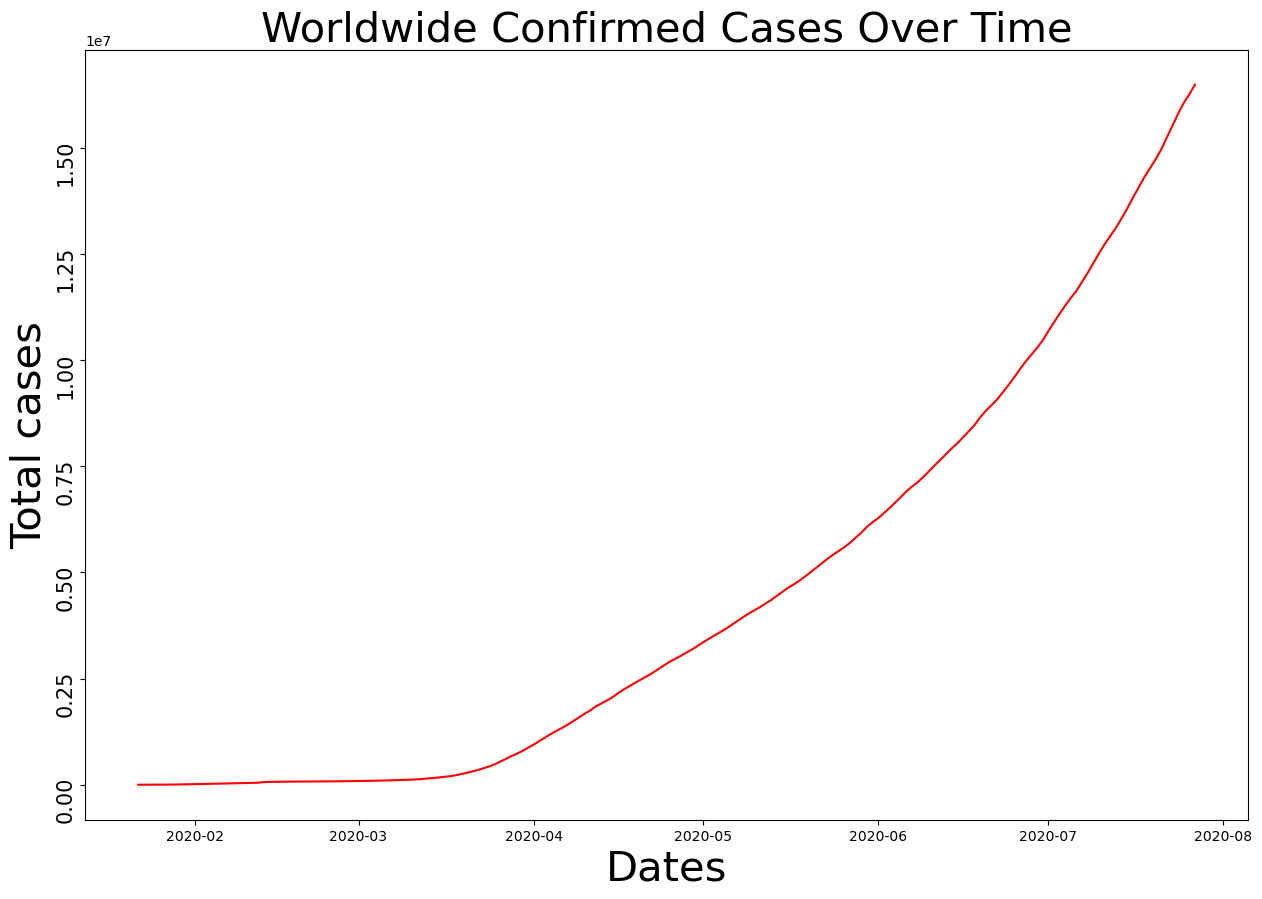

In [15]:
# TREND OF HOW COVID SPREAD
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(rotation = 90, fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)


ax = sns.lineplot(x=total_cases.date, y=total_cases.confirmed, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")
plt.show()

In [16]:
top

state                country        lat       long        date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active             WHO Region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

In [17]:
top_actives = top.groupby('country')['active'].sum().sort_values(ascending = False).reset_index().head(20)
top_actives

country   active
0               US  2816444
1           Brazil   508116
2            India   495499
3   United Kingdom   254427
4           Russia   201097
5     South Africa   170537
6         Colombia   117163
7           France   108928
8           Canada   107514
9             Peru    98752
10      Bangladesh    97577
11           Spain    93613
12       Argentina    91782
13          Sweden    73695
14     Philippines    53649
15           Egypt    52992
16          Mexico    47657
17     Netherlands    47064
18         Bolivia    47056
19    Saudi Arabia    43238

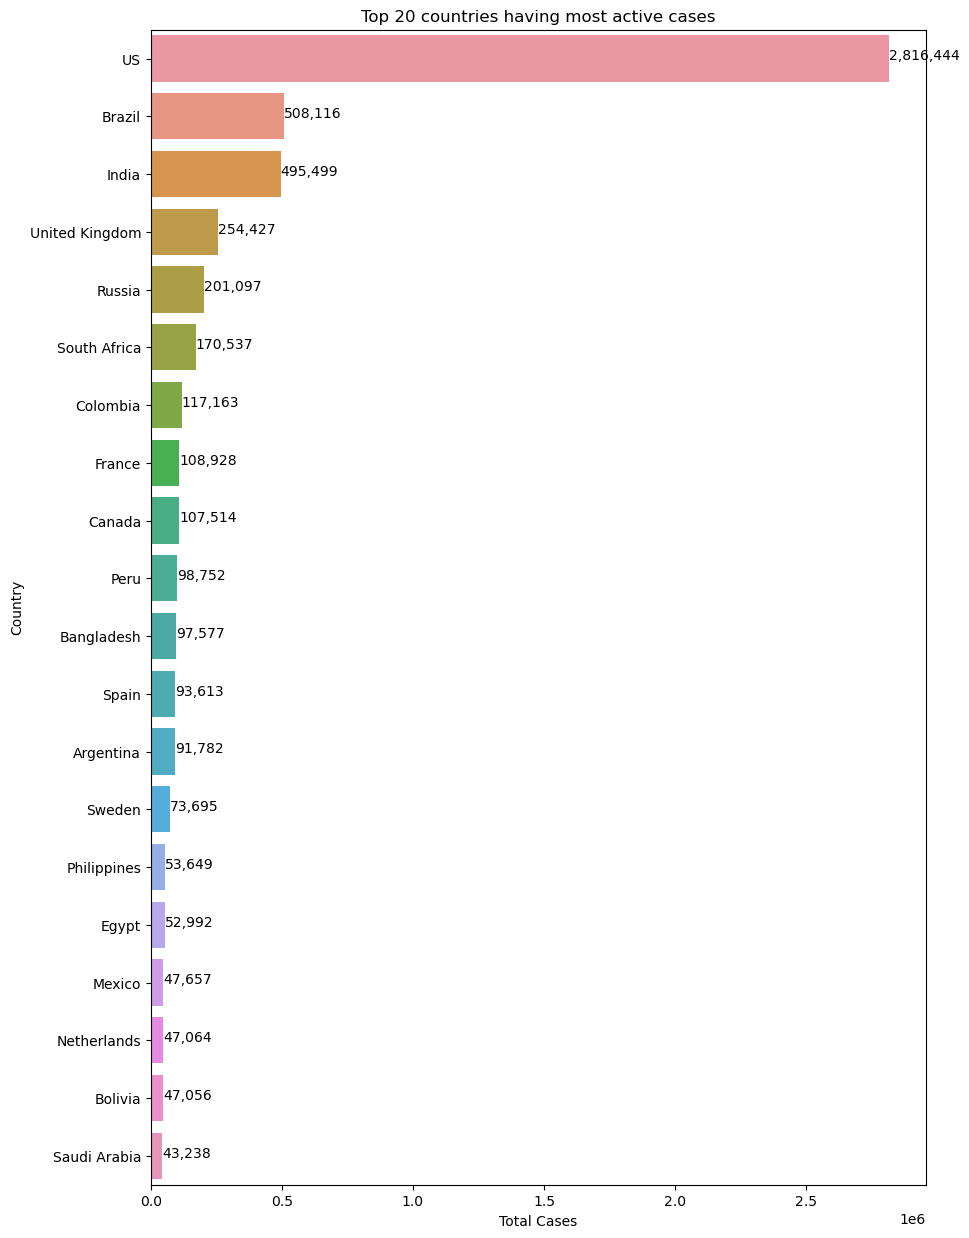

In [18]:
figure = plt.figure(figsize = (10,15))

plt.xlabel('Total cases')
plt.ylabel('country')
plt.title('Top 20 countries having most active cases')
ax = sns.barplot(x=top_actives.active, y = top_actives.country)

for i,(value,name) in enumerate(zip(top_actives.active, top_actives.country)):  
    ax.text(value, i-0.05, f'{value:,.0f}', ha = 'left', va= 'center') 
ax.set(xlabel = 'Total Cases', ylabel = 'Country')
plt.show()

In [19]:
top

state                country        lat       long        date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active             WHO Region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

In [20]:
top_deaths = top.groupby(by = 'country')['deaths'].sum().sort_values(ascending = False).head(20).reset_index()

In [21]:
top_deaths

country  deaths
0               US  148011
1           Brazil   87618
2   United Kingdom   45844
3           Mexico   44022
4            Italy   35112
5            India   33408
6           France   30212
7            Spain   28432
8             Peru   18418
9             Iran   15912
10          Russia   13334
11         Belgium    9822
12           Chile    9187
13         Germany    9125
14          Canada    8944
15        Colombia    8777
16    South Africa    7067
17     Netherlands    6160
18        Pakistan    5842
19          Sweden    5700

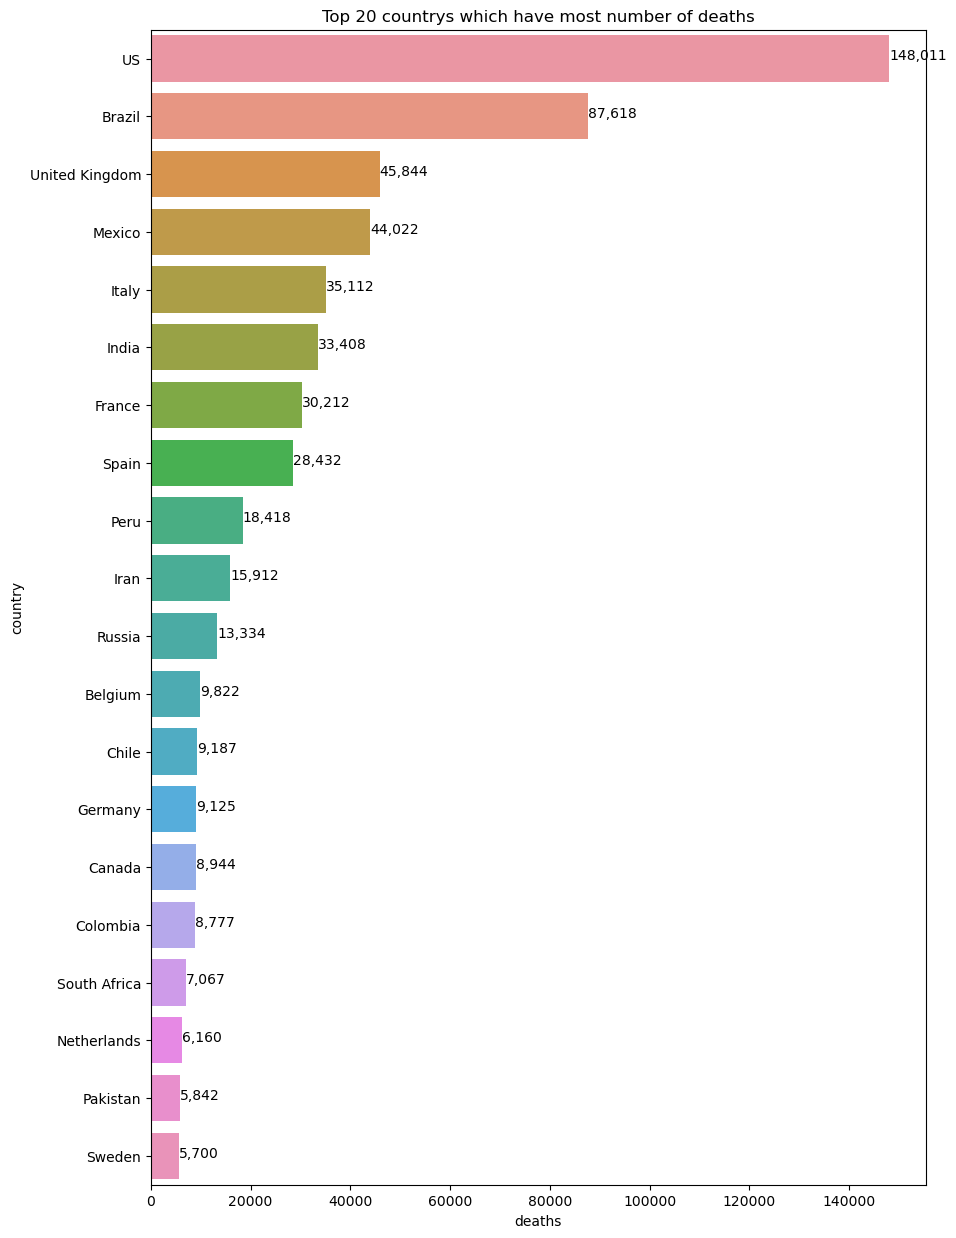

In [22]:
figure = plt.figure(figsize = (10,15))
plt.xlabel('Total deaths')
plt.ylabel('Countries')
plt.title('Top 20 countrys which have most number of deaths')
ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country)

for i, (value,name) in enumerate (zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value, i-0.05, f'{value:,.0f}', ha = 'left', va= 'center')
    
plt.show()

In [23]:
top

state                country        lat       long        date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active             WHO Region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

In [24]:
top_recovered = top.groupby(by = 'country')['recovered'].sum().sort_values(ascending = False).reset_index().head(20)

In [25]:
top_recovered

country  recovered
0         Brazil    1846641
1             US    1325804
2          India     951166
3         Russia     602249
4          Chile     319954
5         Mexico     303810
6   South Africa     274925
7           Peru     272547
8           Iran     255144
9       Pakistan     241026
10  Saudi Arabia     222936
11        Turkey     210469
12         Italy     198593
13       Germany     190314
14         Spain     150376
15      Colombia     131161
16    Bangladesh     125683
17         Qatar     106328
18        France      81212
19         China      78869

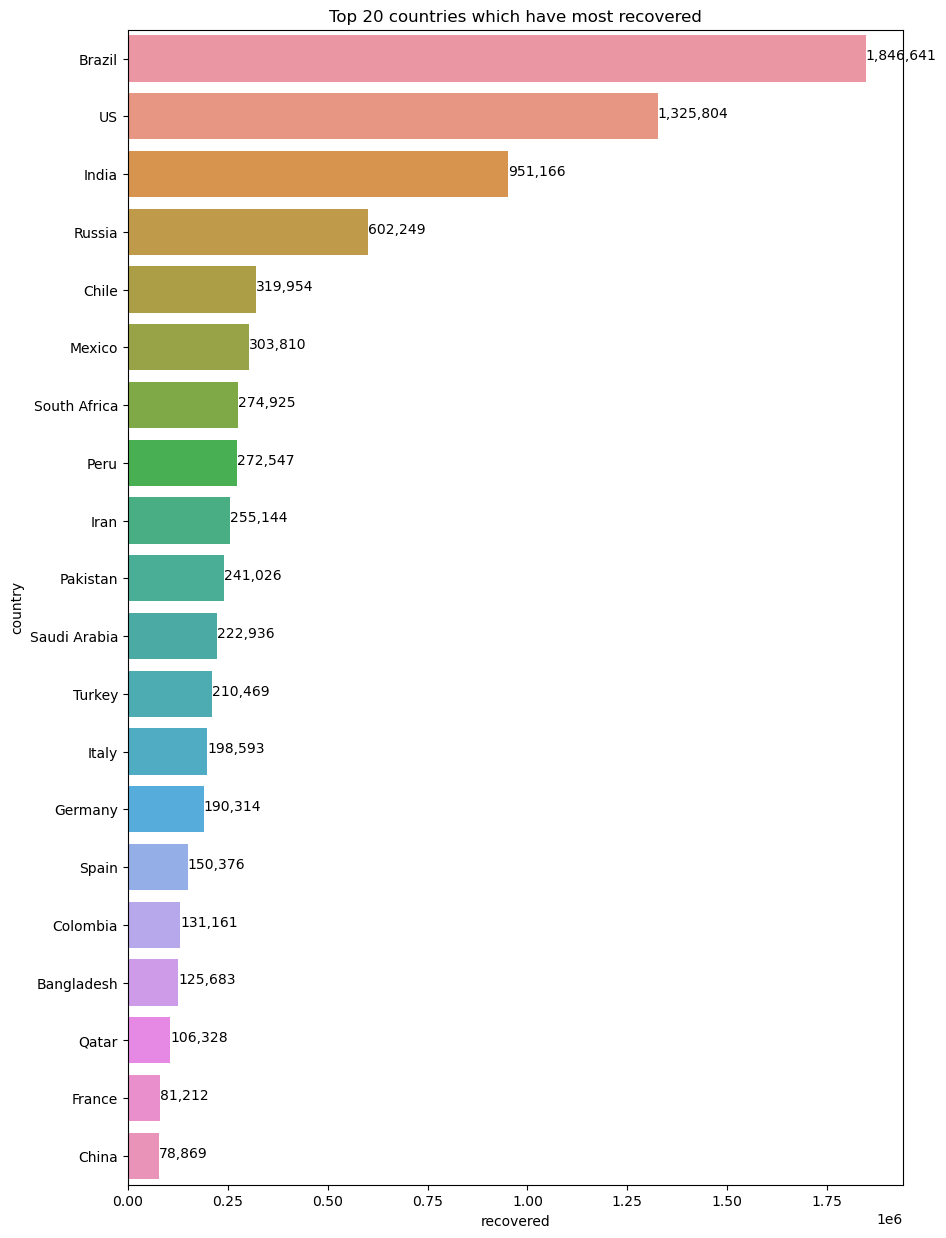

In [26]:
figure = plt.figure(figsize = (10,15))
plt.xlabel('Total Recovered')
plt.ylabel('Countrys')
plt.title('Top 20 countries which have most recovered')
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)

for i,(value,name) in enumerate (zip(top_recovered.recovered, top_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}', ha = 'left', va = 'center')
    
plt.show()

In [27]:
top

state                country        lat       long        date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active             WHO Region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

# Now we will do visulization on country basis

In [28]:
brazil = df[df.country == 'Brazil']
brazil = brazil.groupby(by = 'date')['recovered','deaths','confirmed','active'].sum().reset_index()
brazil                                     

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23    1620313   84082    2287475  583080
184  2020-07-24    1693214   85238    2343366  564914
185  2020-07-25    1785359   86449    2394513  522705
186  2020-07-26    1812913   87004    2419091  519174
187  2020-07-27    1846641   87618    2442375  508116

[188 rows x 5 columns]

In [29]:
brazil.sort_values(by = 'date',ascending = False)

date  recovered  deaths  confirmed  active
187  2020-07-27    1846641   87618    2442375  508116
186  2020-07-26    1812913   87004    2419091  519174
185  2020-07-25    1785359   86449    2394513  522705
184  2020-07-24    1693214   85238    2343366  564914
183  2020-07-23    1620313   84082    2287475  583080
..          ...        ...     ...        ...     ...
4    2020-01-26          0       0          0       0
3    2020-01-25          0       0          0       0
2    2020-01-24          0       0          0       0
1    2020-01-23          0       0          0       0
0    2020-01-22          0       0          0       0

[188 rows x 5 columns]

In [30]:
us = df[df.country == "US"]
us = us.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
us

date  recovered  deaths  confirmed   active
0    2020-01-22          0       0          1        1
1    2020-01-23          0       0          1        1
2    2020-01-24          0       0          2        2
3    2020-01-25          0       0          2        2
4    2020-01-26          0       0          5        5
..          ...        ...     ...        ...      ...
183  2020-07-23    1233269  144430    4038816  2661117
184  2020-07-24    1261624  145560    4112531  2705347
185  2020-07-25    1279414  146465    4178970  2753091
186  2020-07-26    1297863  146935    4233923  2789125
187  2020-07-27    1325804  148011    4290259  2816444

[188 rows x 5 columns]

In [31]:
uk = df[df.country == "United Kingdom"]
uk = uk.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()

uk

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23       1425   45639     298731  251667
184  2020-07-24       1425   45762     299500  252313
185  2020-07-25       1427   45823     300270  253020
186  2020-07-26       1434   45837     301020  253749
187  2020-07-27       1437   45844     301708  254427

[188 rows x 5 columns]

In [32]:
india = df[df.country == "India"]
india= india.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()

india

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     817209   30601    1288108  440298
184  2020-07-24     849432   31358    1337024  456234
185  2020-07-25     885573   32060    1385635  468002
186  2020-07-26     917568   32771    1435616  485277
187  2020-07-27     951166   33408    1480073  495499

[188 rows x 5 columns]

In [33]:
Russia=df[df.country=='Russia']
Russia=Russia.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()

Russia

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     579295   12873     793720  201552
184  2020-07-24     587728   13026     799499  198745
185  2020-07-25     596064   13172     805332  196096
186  2020-07-26     599172   13249     811073  198652
187  2020-07-27     602249   13334     816680  201097

[188 rows x 5 columns]

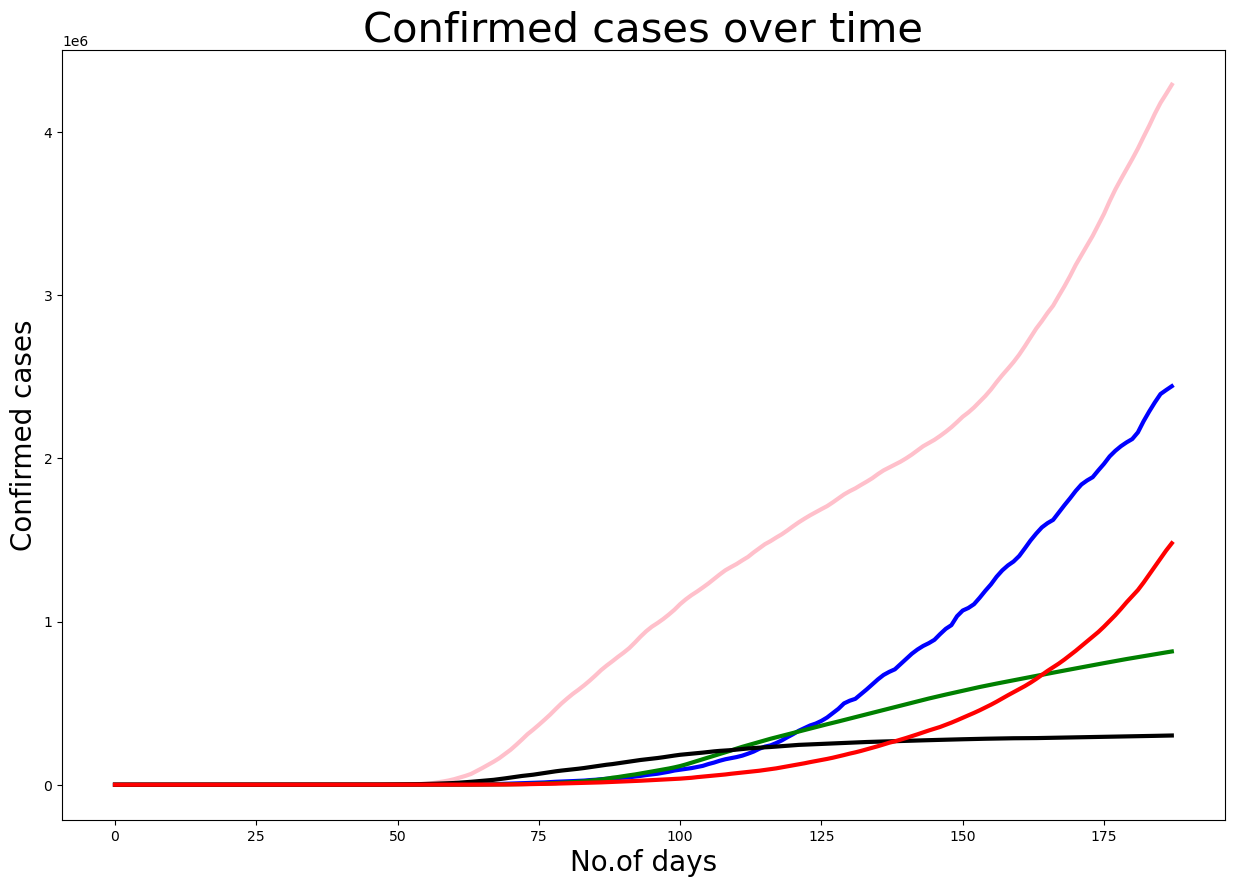

In [34]:
plt.figure(figsize=(15,10))
sns.lineplot(x = brazil.index,y = brazil.confirmed,color="Blue",linewidth = 3)
sns.lineplot(x=us.index,y=us.confirmed,color="Pink",linewidth = 3)
sns.lineplot(x=Russia.index,y=Russia.confirmed,color="Green",linewidth = 3)
sns.lineplot(x=uk.index,y=uk.confirmed,color="Black",linewidth = 3)
sns.lineplot(x=india.index,y=india.confirmed,color="Red",linewidth = 3)
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

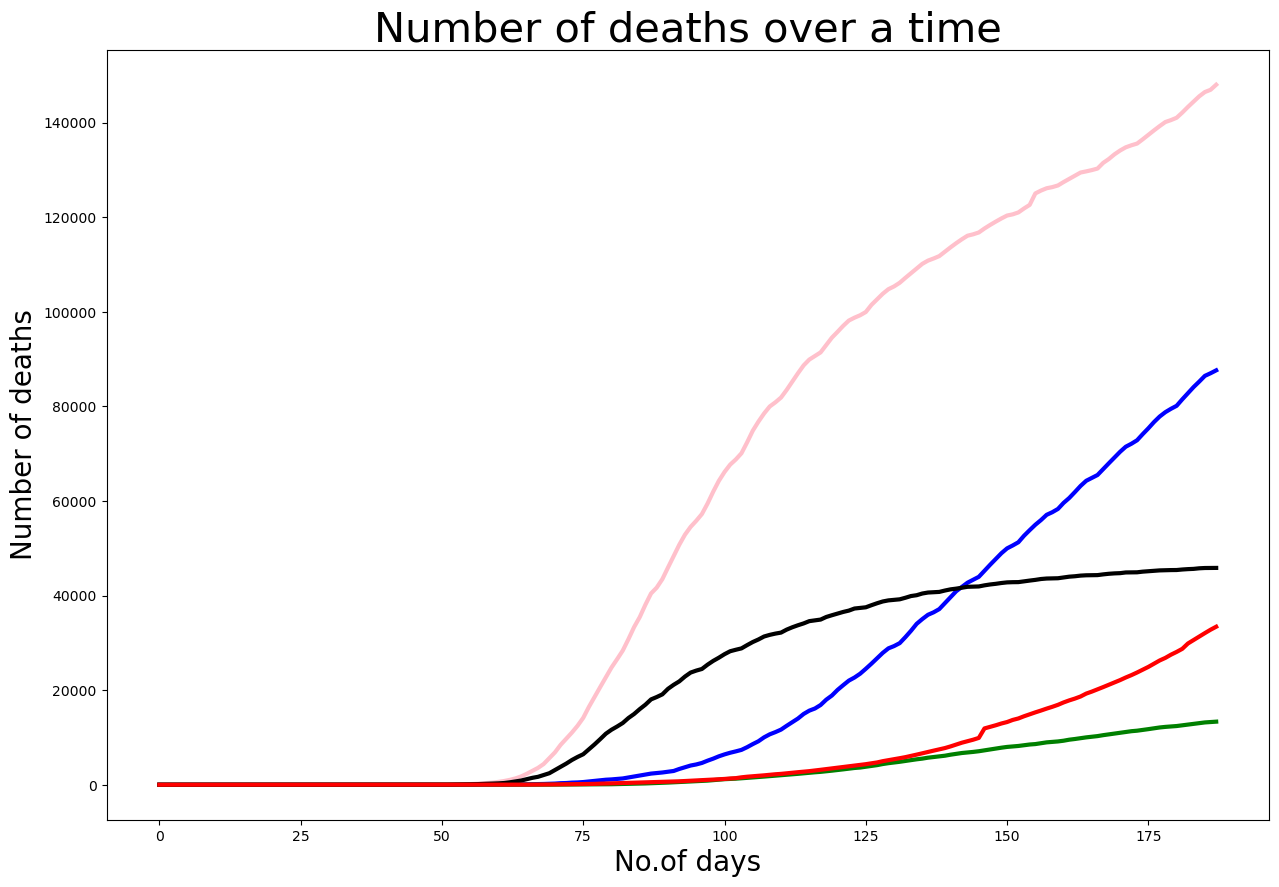

In [35]:
plt.figure(figsize=(15,10))
sns.lineplot(x = brazil.index,y = brazil.deaths,color="Blue",linewidth = 3)
sns.lineplot(x=us.index,y=us.deaths,color="Pink",linewidth = 3)
sns.lineplot(x=Russia.index,y=Russia.deaths,color="Green",linewidth = 3)
sns.lineplot(x=uk.index,y=uk.deaths,color="Black",linewidth = 3)
sns.lineplot(x=india.index,y=india.deaths,color="Red",linewidth = 3)
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Number of deaths',fontsize=20)
plt.title('Number of deaths over a time',fontsize=30)
plt.show()

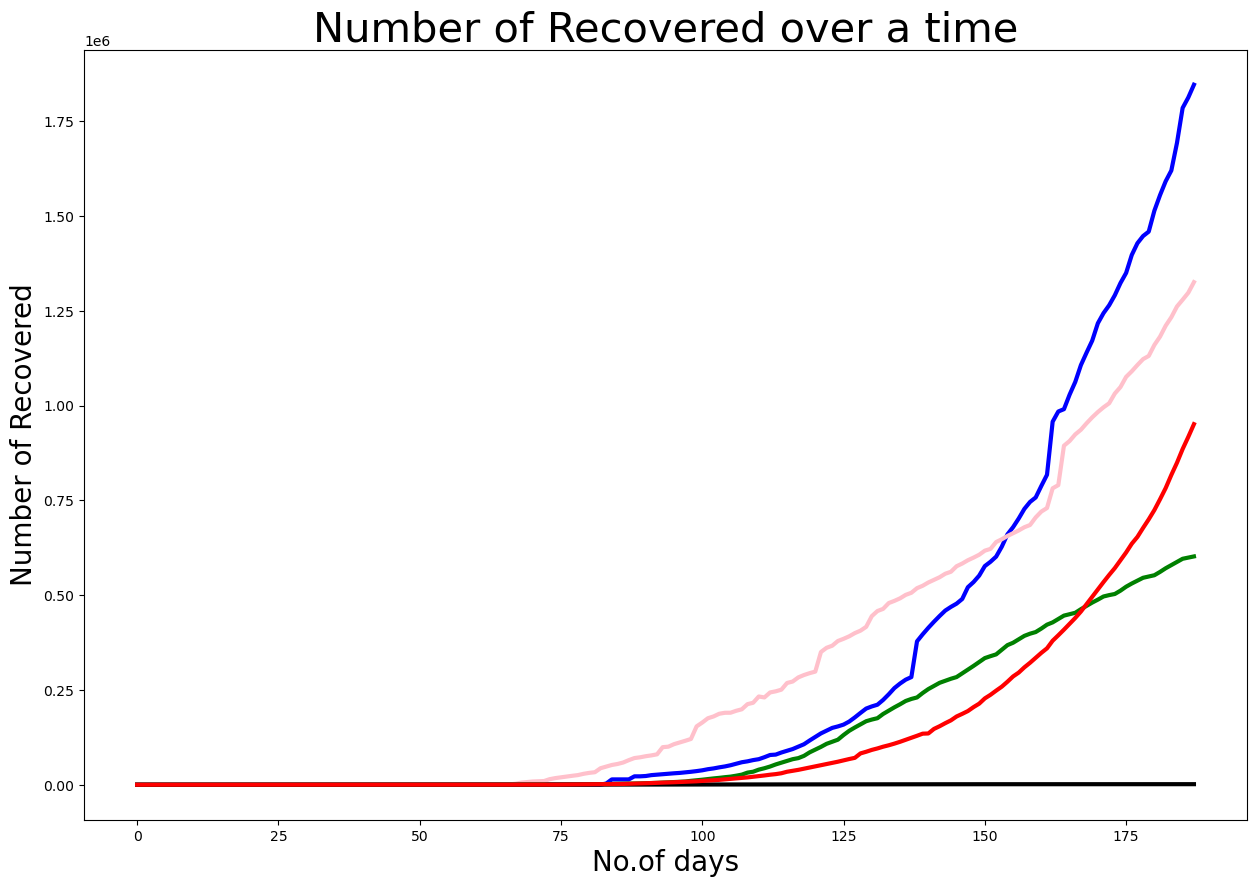

In [36]:
plt.figure(figsize=(15,10))
sns.lineplot(x = brazil.index,y = brazil.recovered,color="Blue",linewidth = 3)
sns.lineplot(x=us.index,y=us.recovered,color="Pink",linewidth = 3)
sns.lineplot(x=Russia.index,y=Russia.recovered,color="Green",linewidth = 3)
sns.lineplot(x=uk.index,y=uk.recovered,color="Black",linewidth = 3)
sns.lineplot(x=india.index,y=india.recovered,color="Red",linewidth = 3)
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Number of Recovered',fontsize=20)
plt.title('Number of Recovered over a time',fontsize=30)
plt.show()

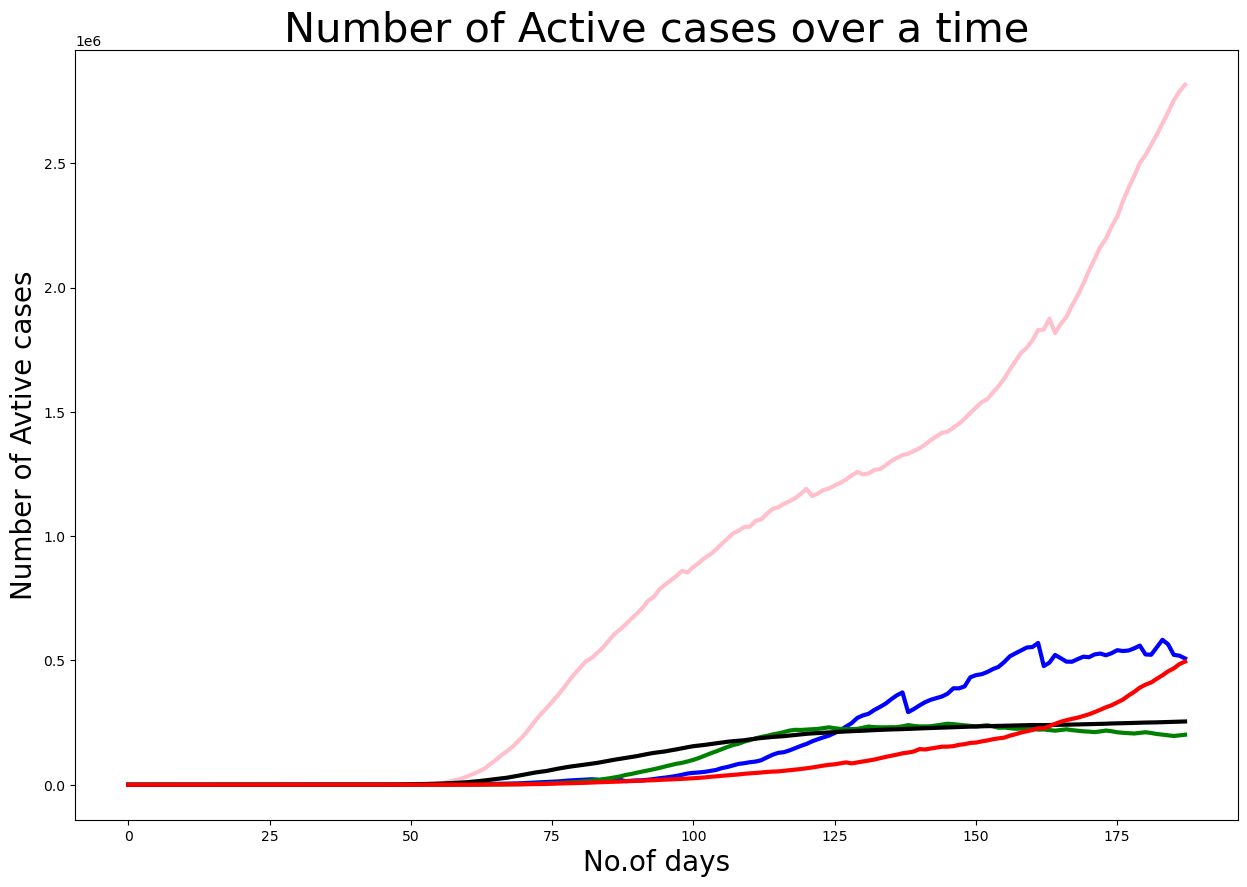

In [37]:
plt.figure(figsize=(15,10))
sns.lineplot(x = brazil.index,y = brazil.active,color="Blue",linewidth = 3)
sns.lineplot(x=us.index,y=us.active,color="Pink",linewidth = 3)
sns.lineplot(x=Russia.index,y=Russia.active,color="Green",linewidth = 3)
sns.lineplot(x=uk.index,y=uk.active,color="Black",linewidth = 3)
sns.lineplot(x=india.index,y=india.active,color="Red",linewidth = 3)
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Number of Avtive cases',fontsize=20)
plt.title('Number of Active cases over a time',fontsize=30)
plt.show()

# Forecasting 

In [38]:
!pip install prophet

In [39]:
from prophet import Prophet

In [40]:
import os
os

<module 'os' from 'C:\\Users\\HP\\anaconda3\\lib\\os.py'>

In [41]:
data = pd.read_csv('covid_19_clean_complete.csv', parse_dates = ['Date'])

In [42]:
data

Province/State         Country/Region        Lat       Long       Date  \
0                NaN            Afghanistan  33.939110  67.709953 2020-01-22   
1                NaN                Albania  41.153300  20.168300 2020-01-22   
2                NaN                Algeria  28.033900   1.659600 2020-01-22   
3                NaN                Andorra  42.506300   1.521800 2020-01-22   
4                NaN                 Angola -11.202700  17.873900 2020-01-22   
...              ...                    ...        ...        ...        ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388 2020-07-27   
49065            NaN                Comoros -11.645500  43.333300 2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100 2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600 2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [43]:
total_active = data['Active'].sum()

In [44]:
print('the total numbers of Active cases are :' ,total_active)

the total numbers of Active cases are : 396715350


In [45]:
Confirmed=data.groupby('Date').sum(['confirmed']).reset_index()
Deaths=data.groupby('Date').sum(['deaths']).reset_index()
Recovered=data.groupby('Date').sum(['recovered']).reset_index()
Confirmed.head()

Date         Lat         Long  Confirmed  Deaths  Recovered  Active
0 2020-01-22  5594.20365  6140.869714        555      17         28     510
1 2020-01-23  5594.20365  6140.869714        654      18         30     606
2 2020-01-24  5594.20365  6140.869714        941      26         36     879
3 2020-01-25  5594.20365  6140.869714       1434      42         39    1353
4 2020-01-26  5594.20365  6140.869714       2118      56         52    2010

In [46]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
deaths = data.groupby('Date').sum()['Deaths'].reset_index()
confirmed.head()

Date  Confirmed
0 2020-01-22        555
1 2020-01-23        654
2 2020-01-24        941
3 2020-01-25       1434
4 2020-01-26       2118

In [47]:
confirmed.head()

Date  Confirmed
0 2020-01-22        555
1 2020-01-23        654
2 2020-01-24        941
3 2020-01-25       1434
4 2020-01-26       2118

In [48]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [49]:
confirmed

ds         y
0   2020-01-22       555
1   2020-01-23       654
2   2020-01-24       941
3   2020-01-25      1434
4   2020-01-26      2118
..         ...       ...
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

[188 rows x 2 columns]

In [50]:
#train

In [51]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)

future=m.make_future_dataframe(periods=7)
future.tail(7)

18:47:10 - cmdstanpy - INFO - Chain [1] start processing
18:47:11 - cmdstanpy - INFO - Chain [1] done processing


ds
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [52]:
forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
190 2020-07-30  1.674387e+07  1.658281e+07  1.689131e+07
191 2020-07-31  1.695904e+07  1.678774e+07  1.712775e+07
192 2020-08-01  1.716673e+07  1.698611e+07  1.733094e+07
193 2020-08-02  1.736428e+07  1.719215e+07  1.753799e+07
194 2020-08-03  1.755891e+07  1.737144e+07  1.773020e+07

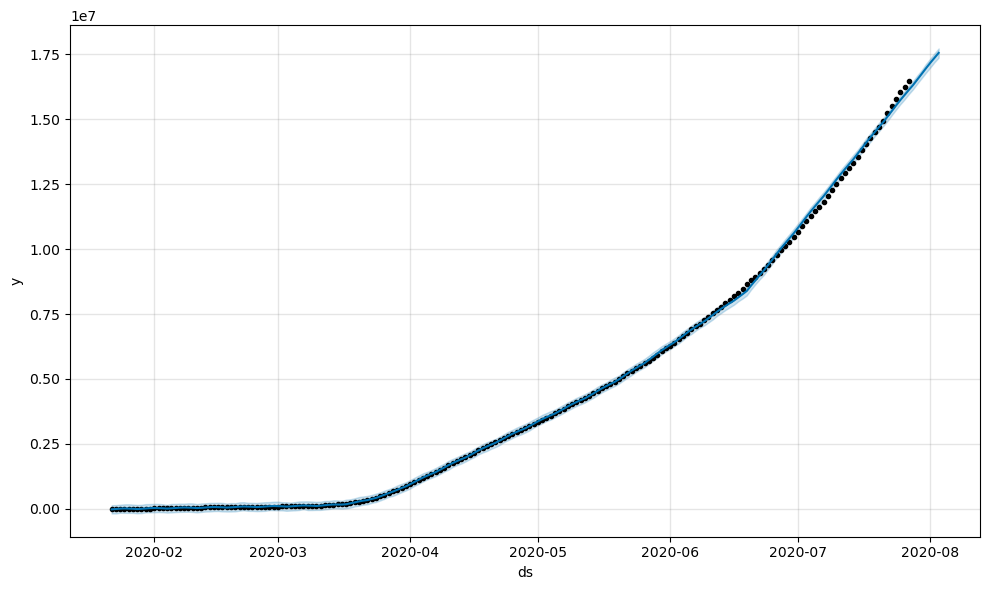

In [53]:
confirmed_forecast_plot = m.plot(forecast)

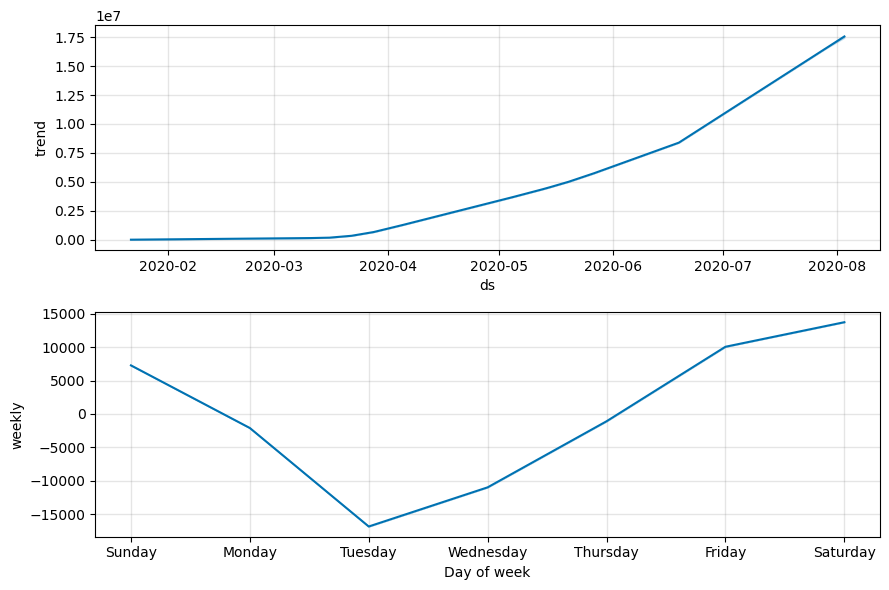

In [54]:
confirmed_forecast_plot = m.plot_components(forecast)

In [55]:
Recovered = data.groupby('Date').sum(['recovered']).reset_index()

In [56]:
Recovered

Date         Lat         Long  Confirmed  Deaths  Recovered   Active
0   2020-01-22  5594.20365  6140.869714        555      17         28      510
1   2020-01-23  5594.20365  6140.869714        654      18         30      606
2   2020-01-24  5594.20365  6140.869714        941      26         36      879
3   2020-01-25  5594.20365  6140.869714       1434      42         39     1353
4   2020-01-26  5594.20365  6140.869714       2118      56         52     2010
..         ...         ...          ...        ...     ...        ...      ...
183 2020-07-23  5594.20365  6140.869714   15510481  633506    8710969  6166006
184 2020-07-24  5594.20365  6140.869714   15791645  639650    8939705  6212290
185 2020-07-25  5594.20365  6140.869714   16047190  644517    9158743  6243930
186 2020-07-26  5594.20365  6140.869714   16251796  648621    9293464  6309711
187 2020-07-27  5594.20365  6140.869714   16480485  654036    9468087  6358362

[188 rows x 7 columns]

In [57]:
recovered = data.groupby('Date').sum()['Recovered'].reset_index()

In [58]:
recovered

Date  Recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
..         ...        ...
183 2020-07-23    8710969
184 2020-07-24    8939705
185 2020-07-25    9158743
186 2020-07-26    9293464
187 2020-07-27    9468087

[188 rows x 2 columns]

In [59]:
recovered.columns=['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [60]:
recovered

ds        y
0   2020-01-22       28
1   2020-01-23       30
2   2020-01-24       36
3   2020-01-25       39
4   2020-01-26       52
..         ...      ...
183 2020-07-23  8710969
184 2020-07-24  8939705
185 2020-07-25  9158743
186 2020-07-26  9293464
187 2020-07-27  9468087

[188 rows x 2 columns]

In [61]:
m2 = Prophet(interval_width = 0.95)
m2.fit(recovered)

18:47:13 - cmdstanpy - INFO - Chain [1] start processing
18:47:13 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
future_2 = m2.make_future_dataframe(periods = 7)
future_2.tail()

ds
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [63]:
forecast_2 = m.predict(future_2)
forecast_2[['ds','yhat','yhat_lower','yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -2.044339e+04 -1.855156e+05  1.374553e+05
1   2020-01-23 -7.841899e+03 -1.705790e+05  1.374239e+05
2   2020-01-24  6.024571e+03 -1.519857e+05  1.781259e+05
3   2020-01-25  1.240772e+04 -1.373496e+05  1.713175e+05
4   2020-01-26  8.645679e+03 -1.494816e+05  1.700614e+05
..         ...           ...           ...           ...
190 2020-07-30  1.674387e+07  1.658687e+07  1.690380e+07
191 2020-07-31  1.695904e+07  1.679760e+07  1.713507e+07
192 2020-08-01  1.716673e+07  1.700707e+07  1.733540e+07
193 2020-08-02  1.736428e+07  1.719726e+07  1.753454e+07
194 2020-08-03  1.755891e+07  1.737545e+07  1.773285e+07

[195 rows x 4 columns]

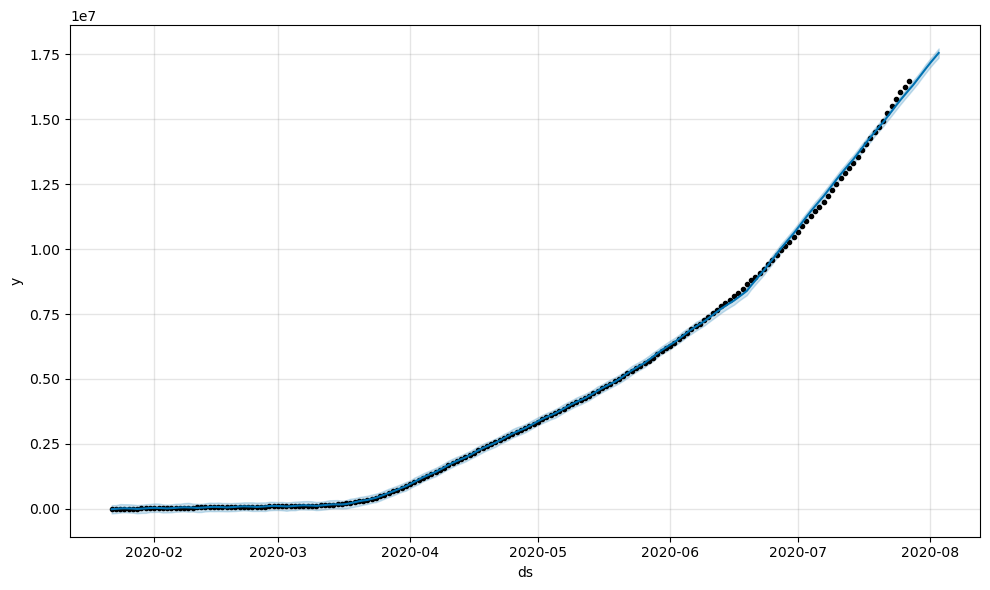

In [65]:
recovered_forecast_plot = m.plot(forecast_2)

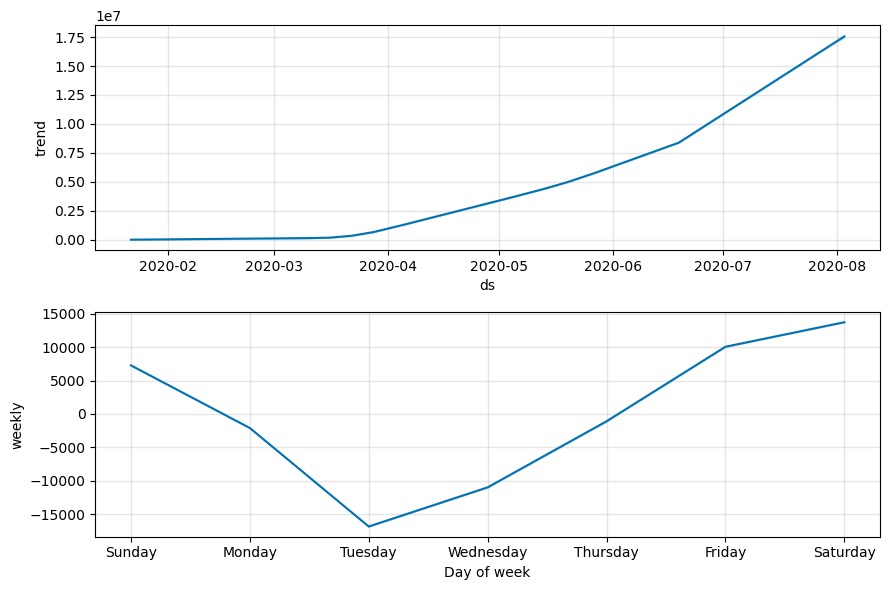

In [66]:
recovered_forecast_plot = m.plot_components(forecast_2)

In [67]:
Deaths = data.groupby('Date').sum(['Deaths']).reset_index()
Deaths

Date         Lat         Long  Confirmed  Deaths  Recovered   Active
0   2020-01-22  5594.20365  6140.869714        555      17         28      510
1   2020-01-23  5594.20365  6140.869714        654      18         30      606
2   2020-01-24  5594.20365  6140.869714        941      26         36      879
3   2020-01-25  5594.20365  6140.869714       1434      42         39     1353
4   2020-01-26  5594.20365  6140.869714       2118      56         52     2010
..         ...         ...          ...        ...     ...        ...      ...
183 2020-07-23  5594.20365  6140.869714   15510481  633506    8710969  6166006
184 2020-07-24  5594.20365  6140.869714   15791645  639650    8939705  6212290
185 2020-07-25  5594.20365  6140.869714   16047190  644517    9158743  6243930
186 2020-07-26  5594.20365  6140.869714   16251796  648621    9293464  6309711
187 2020-07-27  5594.20365  6140.869714   16480485  654036    9468087  6358362

[188 rows x 7 columns]

In [68]:
deaths = data.groupby('Date').sum()['Deaths'].reset_index()
deaths

Date  Deaths
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [69]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [70]:
m3 = Prophet(interval_width = 0.95)
m3.fit(deaths)

18:47:47 - cmdstanpy - INFO - Chain [1] start processing
18:47:47 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
future_3 = m3.make_future_dataframe(periods = 7)
future_3.tail()

ds
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [72]:
forecast_3 = m3.predict(future_3)
forecast_3[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
190 2020-07-30  663509.697722  660366.363739  666959.029518
191 2020-07-31  669026.358583  665544.243550  672398.807222
192 2020-08-01  673909.343577  670152.458282  677950.700774
193 2020-08-02  678047.385907  673232.201383  682833.242418
194 2020-08-03  682337.962852  676867.328220  688281.146593

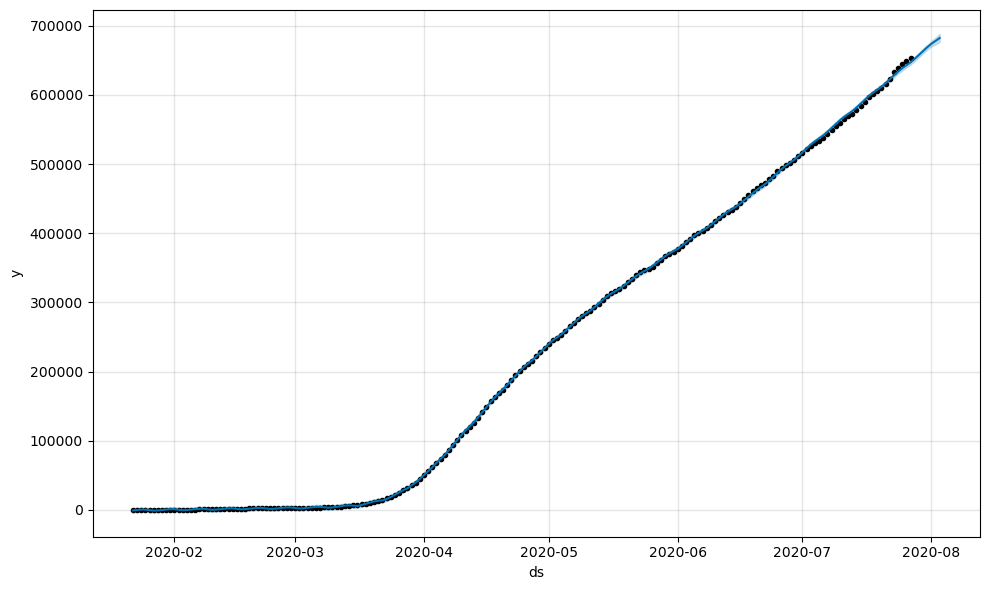

In [73]:
deaths_forecast_plot = m3.plot(forecast_3)

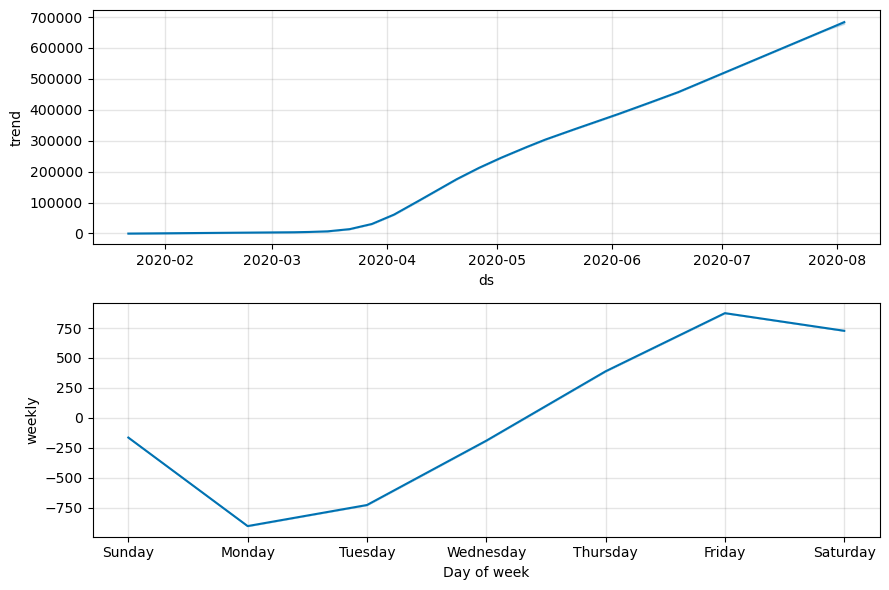

In [74]:
deaths_forecast_plot = m3.plot_components(forecast_3)